# ML LocalServer - Learnings


## Udacity to Machine Learning

[udacity course](https://classroom.udacity.com/courses/ud120)

# SVM - Support Vector Machine
Goal of SVM - is to generate a vector that separates groupings of datapoints into classified sets.

### Reasons to Use
- Data has many dimensions (features)
- High accuracy desired

### Reasons to Avoid
- Very large datasets (slow to train)
- Overlapping classes (separatability assumed)

### Terminology

| Term | Definition |
| :- | :- |
| Margin | distance to nearest point |
|Decision Surface | n dimentional seperating geometry. Line, plane, ect |

### Resources
[Scikit-learn support vector machine](https://scikit-learn.org/stable/modules/svm.html)

In [23]:
# From https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
X = [[0, 0], [1,1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [5]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [6]:
clf.predict([[2., 2.]])

array([1])

___
## SVM Python Example
> Udacity Example - Lesson 3, concept 12. Coding Up the SVM
### Modified to use real Cancer dataset, 30 features, 569 samples
  - sklearn svm command
  - clf = svm.SVC(kernel="linear")
  - clf.fit(X, Y)
| term | Definition |
| :- | :- |
| clf | classifier object, from svm.SCV |
| kernel | linear, rbf, polynomial, sigmoid |
| X | an array X of shape X[n_samples, n_features] = dataField |
| Y | an array Y of shape 

In [11]:
import sys

import matplotlib.pyplot as plt
import copy
import numpy as np

########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
from sklearn import datasets

clf = SVC(kernel="linear")

cancer = datasets.load_breast_cancer() # container object w data, feature_names, target [labels]
x_features_meanArea = cancer.data[:,3] # 569,30 ndarray; taking 569,1 size vector correspondig to mean area
x_features_meanSmoothness = cancer.data[:,4] # ^samesame, corresponding to smoothness of tumor

X_features = np.ndarray( shape=(569,2) ) # note: SVM method needs at least 2 features!!
X_features[:,0] = x_features_meanArea
X_features[:,1] = x_features_meanSmoothness
x_featureNames = cancer.feature_names[3:5]
y_labels_malignantBenign = cancer.target # 569,1 ndarray; values: 0|malignant, 1|benign




#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels_malignantBenign, test_size=0.3, random_state=109)

clf.fit(X_train, y_train) # train the svm...


#### store your predictions in a list named pred
pred = clf.predict(X_test)


from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
print(f"Accuracy using tumar mean area and smoothness only: {acc:.3f}")

### quickly do same on full model
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)
clf.fit(X_train,y_train)
predFull = clf.predict(X_test)
accFull = accuracy_score(predFull, y_test)
print(f"Accuracy using full 30 factor tumor evaluation: {accFull:.3f}")
print(f"Number of samples: 569, Method: Support Vector Machine (SVM), Kernel: Linear")

def submitAccuracy():
    return acc

Accuracy using tumar mean area and smoothness only: 0.930
Accuracy using full 30 factor tumor evaluation: 0.965
Number of samples: 569, Method: Support Vector Machine (SVM), Kernel: Linear


___
## Other SVM Notes
### Linearly sepeartable or not
- sometimes, can come up with a transformation to create _linear seperatability_
- in this case, the value after transformation, is infact... a new **Feature (z)**
  - **_z_** = x^2 + y^2
  - $ z_{i} = x_{i}^2 + y_{i}^2 $
  - $$ Z = \sum^{k}_{i=1}\,x_{i}^2 + y_{i}^2 $$
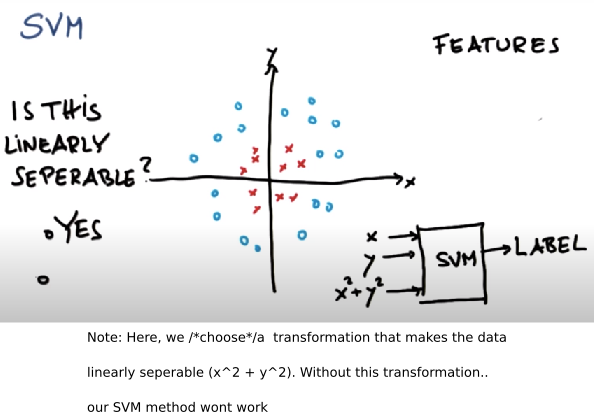

### SVM C Parameter (rbf kernel)
> C - Controls tradeoff between _smooth_ decision boundary  
> and _classifying_ training points correctly

___
# Decision Trees

### Reasons to Use
- Easy to debug and visualize
- Many applications

### Reasons to Avoid
- Prone to overfitting (param: min_samples_split)

## Example - Windsurfing
Note, in this example - the question is simply:
- Should i go wind surfing?
- This label has Yes, No 1|0
- Use SVM?
  - No. SVM requeres linearly seperatability.
  - This dataset does not appear to have this property
  
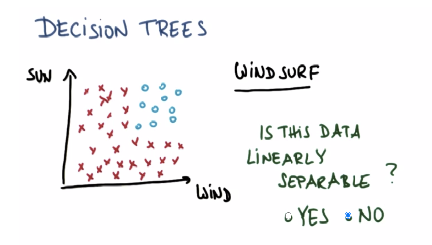

### What they are
> Decision trees  
> Let you ask multiple questions, one after the other, to make a decision / classifcation
> 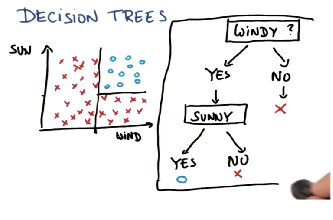

U end up defining decision boundaries such as  
> 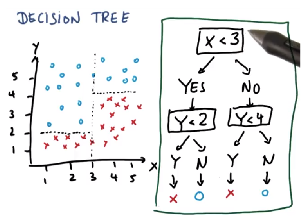
>  $ x < 3 $  
>  If Yes, then next best separation:  
>  $ y < 2 $

### What is the accuracy?

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels_malignantBenign, test_size=0.3, random_state=0)
# ^Note: This is using the Cancer dataset, specifically w 2 features, tumur area & smoothness

### Train / Predict using decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

### Accuracy of decision tree
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
print(f"Accuracy of decision tree using tumar mean area and smoothness only: {acc:.3f}")

Accuracy of decision tree using tumar mean area and smoothness only: 0.901


### Visualization

['mean area' 'mean smoothness']


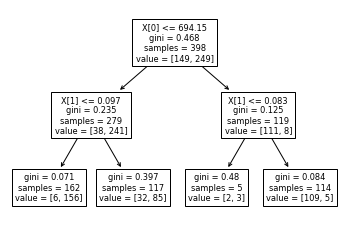

In [24]:
## Visualize tree
tree.plot_tree(clf)

## Visualize using graphviz
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

## Visualize using text
from sklearn.tree import export_text
print(x_featureNames)
r = export_text(clf, feature_names=list(x_featureNames)) # note: export_next takes native list for feature names

### Tuning a decision tree
#### Min samples split
Below this value, u are no longer allowed to split further
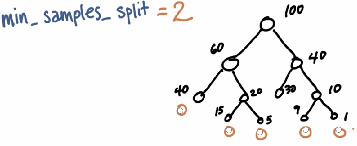  
This parameter is a mechanism to prevent against overfitting

### Where... does decision tree split data? 
> _**Entropy**_ determines this
#### Entropy - measure of impurity in a bunch of examples
What is the entropy at a given node?  
U must look at the fraction of children in each class  
Note: Leaf nodes have zero entropy... no children  
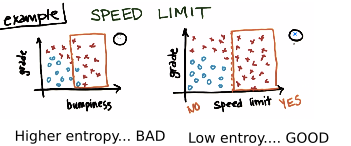

| Entropy Value | Description |
| :-- | :-- |
| 0    | all examples / samples are of the *same class* |
| 1    | all examples are *evenly split* among classes  |

#### Equations
$$
entropy = -\sum_{i}\ p_{i}*\log_{2}(p_{i})  \\
p_{i} = \text{fraction of total samples in class i}\
$$

### Information gain
> Parent vs Child  
> ... _how much did *entropy* decreases by adding child layer?

$$
informationGain = entropy(parent) -[weightedAvg]entropy(children)\\
$$
Weighted: by number of samples in each child i presume
$ weight_{i}=n_{classi}/n_{total} $
> Range of Information gain
> .... _0_ no info gain to _1_ perfect predictor

### Bias vs variance dilemma
> high bias...... don't pay attention to new data  
> high variance.. don't pay attention to the past  